In [58]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np

from src.general_methods.visualizer import Visualizer
from src.optics.split_step_fourier import SplitStepFourier

In [60]:
# setup params
ssf = SplitStepFourier(
    b2=-20e-27,
    gamma=0.003,
    t0=125e-12,
    dt=1,
    z_n=1000e3,
    dz=200,
    D=1e-20,
    with_noise=False,
    verbose=True
)

SSF params: N = 5000, P_0 = 0.00042666666666666667


In [61]:
# building the input signal
Po = .00064
C = -2
Ao = np.sqrt(Po)
to = 125e-12
tau_vec = np.arange(-4096e-12, 4095e-12, 1e-12)

x = Ao*np.exp(-((1 + 1j*(-C))/2.0)*(tau_vec/to) ** 2)
x = np.array(x)
# Visualizer.my_plot(tau_vec, np.abs(x), name='input |x(x)|', xlabel='time')

In [62]:
# old channel y1 without noise
ssf.with_noise = False
y1 = ssf(x)

# Visualizer.my_plot(tau_vec, np.abs(y1), name='output |y1(t)| - no noise', xlabel='time')

In [63]:
# new channel y2 with noise
ssf.with_noise = True
y2 = ssf(x)

# Visualizer.my_plot(tau_vec, np.abs(y1), name='output |y2(t)| - with noise', xlabel='time')

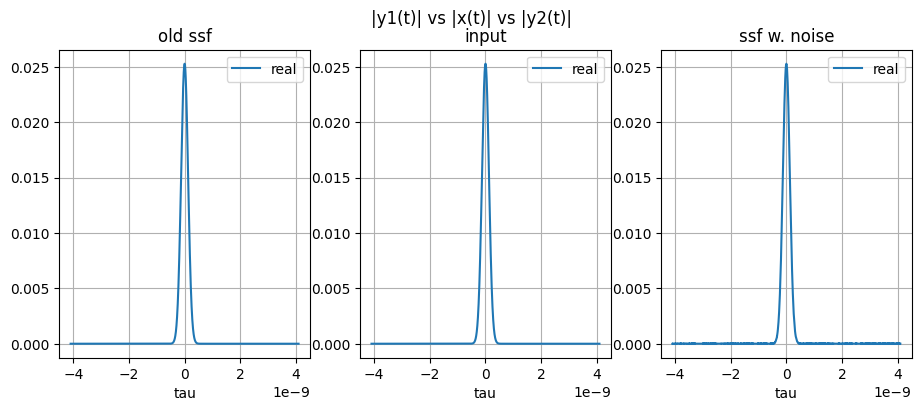

In [64]:
# compare em all
Visualizer.data_trio_plot(np.abs(y1), np.abs(x), np.abs(y2), 
                          zoom_indices=None,
                          title = '|y1(t)| vs |x(t)| vs |y2(t)|',
                          x_vec=tau_vec, xlabel='tau',
                          names=['old ssf', 'input', 'ssf w. noise'])

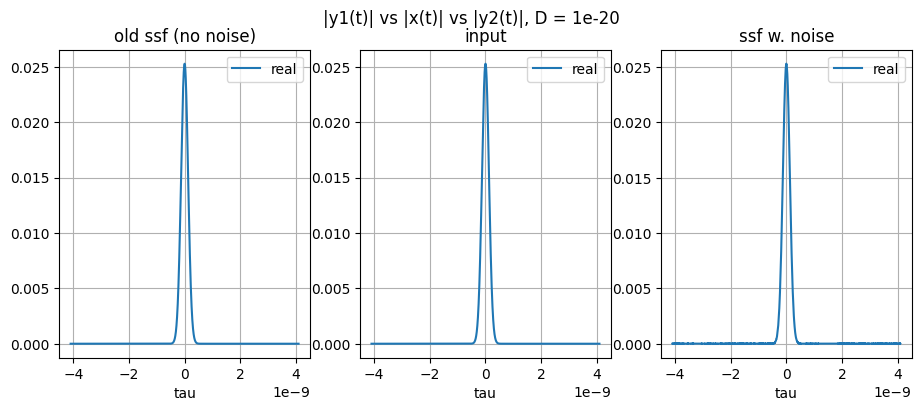

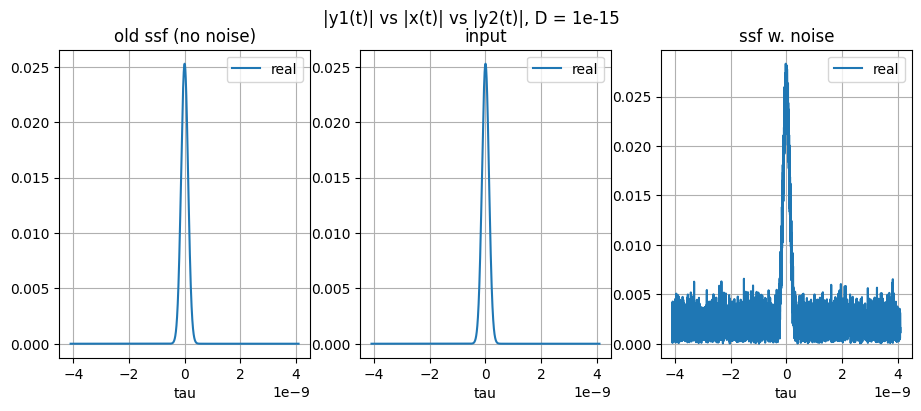

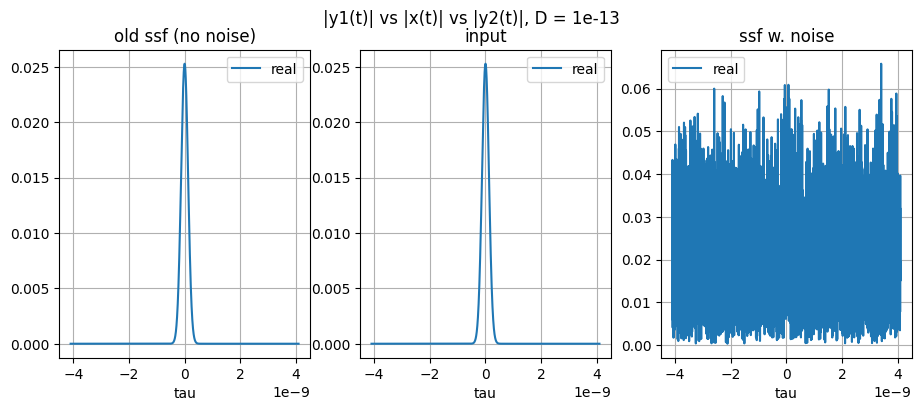

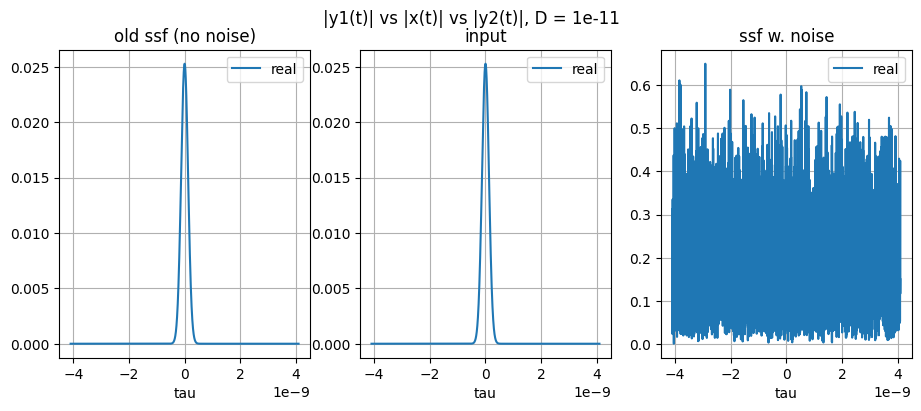

In [70]:
for D in [1e-20, 1e-15, 1e-13, 1e-11]:
    ssf.D = D
    y2 = ssf(x)
    Visualizer.data_trio_plot(np.abs(y1), np.abs(x), np.abs(y2), 
                          zoom_indices=None,
                          title = f'|y1(t)| vs |x(t)| vs |y2(t)|, D = {D}',
                          x_vec=tau_vec, xlabel='tau',
                          names=['old ssf (no noise)', 'input', 'ssf w. noise'])

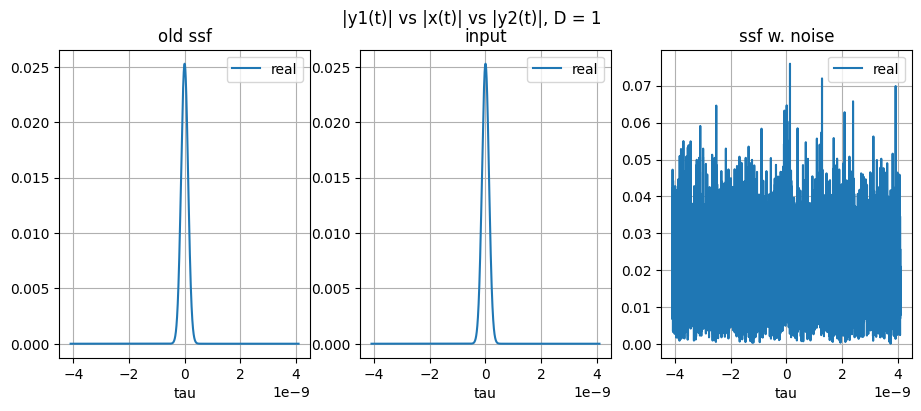

In [68]:
ssf.D = 1e-13
y2 = ssf(x)
Visualizer.data_trio_plot(np.abs(y1), np.abs(x), np.abs(y2), 
                        zoom_indices=None,
                        title = f'|y1(t)| vs |x(t)| vs |y2(t)|, D = {D}',
                        x_vec=tau_vec, xlabel='tau',
                        names=['old ssf', 'input', 'ssf w. noise'])